In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_current = pd.read_csv("data/ABT_SEG_PRP_ECH.csv",index_col="id_code", delimiter=';')
df_m3 = pd.read_csv("data/ABT_SEG_PRP_ECH_M3.csv",index_col="id_code", delimiter=';')

In [3]:
df_current.head()

,revenu_voix,ARPM,P_Dur_Offnet,revenu_inter_roaming,revenu_gaming,revenu_sms_plus,VOLUME_SESSION,P_DUR_STAT_S,ARPU,AVG_J_S,...,revenu_roaming,HANDSET,revenu_cdr,revenu_sms,P_revenu_data,P_FF_Journalier,P_FF_mensuel,P_N_Rech_sup5,role,REGION
id_code,,,,,,,,,,,,,,,,,,,,,
ID_10006846,3.18,0.32,0.59,0.00,0.0,0.0,0.04,0.17,3.33,2.91,...,0.0,2G,3.18,0.00,0.05,0.17,0.0,0.00,Leader,Ben Arous
ID_10012397,15.41,0.04,0.50,0.48,0.0,0.0,0.03,0.00,15.66,0.00,...,0.0,4G,15.66,0.25,0.00,0.00,0.0,0.75,Bridge,Sidi Bouzid
ID_10015997,12.10,0.09,0.80,0.00,0.0,0.0,0.17,0.00,12.11,0.00,...,0.0,2G,12.11,0.01,0.00,0.00,0.0,0.07,Bridge,Kairouan
ID_10016529,27.77,0.06,0.45,0.33,0.0,0.0,0.00,0.00,27.77,0.00,...,0.0,2G,27.77,0.00,0.00,0.00,0.0,0.86,Bridge,Sidi Bouzid
ID_10018038,13.53,0.15,0.53,0.00,0.0,0.0,0.00,0.00,13.53,0.00,...,0.0,2G,13.53,0.00,0.00,0.00,0.0,0.52,Bridge,Jendouba


In [4]:
df_current.columns

Index(['revenu_voix', 'ARPM', 'P_Dur_Offnet', 'revenu_inter_roaming',
       'revenu_gaming', 'revenu_sms_plus', 'VOLUME_SESSION', 'P_DUR_STAT_S',
       'ARPU', 'AVG_J_S', 'ANC_M', 'MNT_RECH', 'NB_RECH', 'Rech_Moy',
       'NB_JR_RECH', 'FREQ_RECH', 'NB_CHANG_STATUT_OFFRE', 'MNT_FORFAIT_DATA',
       'FREQ_USSD', 'Duree_offnet_tot', 'DUREE_APPEL_TOT', 'NB_JOUR_ACT_IN',
       'DUREE_APPEL_IN', 'revenu_inter', 'revenu_roaming', 'HANDSET',
       'revenu_cdr', 'revenu_sms', 'P_revenu_data', 'P_FF_Journalier',
       'P_FF_mensuel', 'P_N_Rech_sup5', 'role', 'REGION'],
      dtype='object')

In [5]:
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20550 entries, ID_10006846 to ID_9985165
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenu_voix            20550 non-null  float64
 1   ARPM                   20550 non-null  float64
 2   P_Dur_Offnet           20550 non-null  float64
 3   revenu_inter_roaming   20550 non-null  float64
 4   revenu_gaming          20550 non-null  float64
 5   revenu_sms_plus        20550 non-null  float64
 6   VOLUME_SESSION         20550 non-null  float64
 7   P_DUR_STAT_S           20550 non-null  float64
 8   ARPU                   20550 non-null  float64
 9   AVG_J_S                20550 non-null  float64
 10  ANC_M                  20550 non-null  int64  
 11  MNT_RECH               20066 non-null  float64
 12  NB_RECH                20066 non-null  float64
 13  Rech_Moy               20066 non-null  float64
 14  NB_JR_RECH             20066 non-null  float

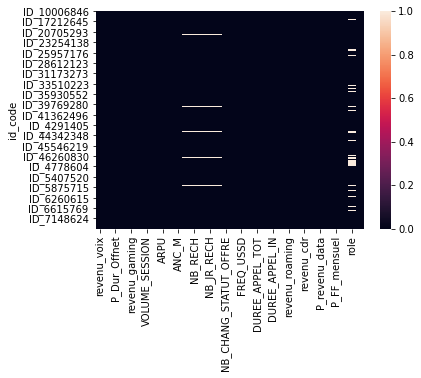

In [6]:
sns.heatmap(df_current.isnull())
plt.show()

In [7]:
df_current_2g = df_current[df_current["HANDSET"] == "2G"].copy()
df_current_3g = df_current[df_current["HANDSET"] == "3G"].copy()
df_current_4g = df_current[df_current["HANDSET"] == "4G"].copy()

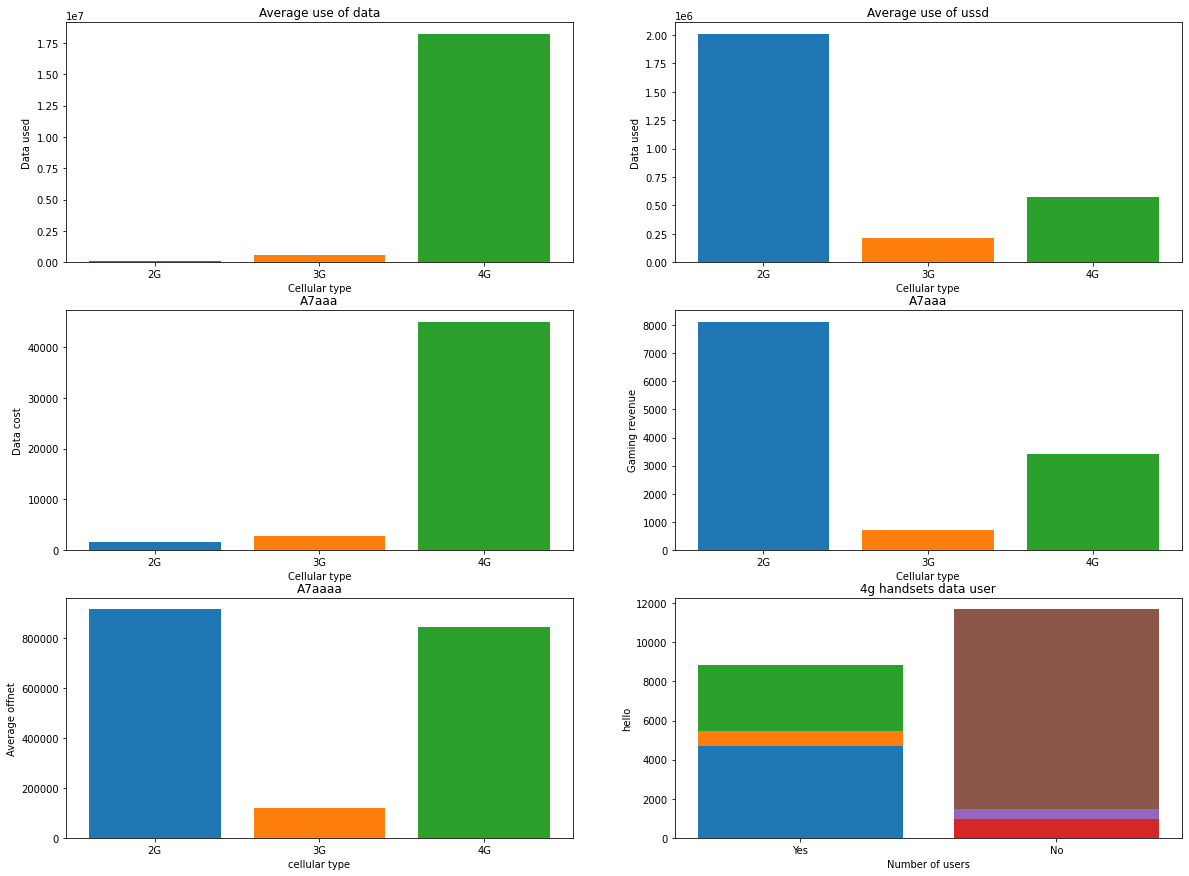

In [8]:
fig, ax = plt.subplots(3,2,figsize=(20,15))

ax[0, 0].set_title("Average use of data")
ax[0, 0].bar("2G", df_current_2g["VOLUME_SESSION"].sum())
ax[0, 0].bar("3G", df_current_3g["VOLUME_SESSION"].sum())
ax[0, 0].bar("4G", df_current_4g["VOLUME_SESSION"].sum())
ax[0, 0].set_xlabel("Cellular type")
ax[0, 0].set_ylabel("Data used")

ax[0, 1].set_title("Average use of ussd")
ax[0, 1].bar("2G", df_current_2g["FREQ_USSD"].sum())
ax[0, 1].bar("3G", df_current_3g["FREQ_USSD"].sum())
ax[0, 1].bar("4G", df_current_4g["FREQ_USSD"].sum())
ax[0, 1].set_xlabel("Cellular type")
ax[0, 1].set_ylabel("Data used")

ax[1, 0].set_title("A7aaa")
ax[1, 0].bar("2G", df_current_2g["MNT_FORFAIT_DATA"].sum())
ax[1, 0].bar("3G", df_current_3g["MNT_FORFAIT_DATA"].sum())
ax[1, 0].bar("4G", df_current_4g["MNT_FORFAIT_DATA"].sum())
ax[1, 0].set_xlabel("Cellular type")
ax[1, 0].set_ylabel("Data cost")

ax[1, 1].set_title("A7aaa")
ax[1, 1].bar("2G", df_current_2g["revenu_gaming"].sum())
ax[1, 1].bar("3G", df_current_3g["revenu_gaming"].sum())
ax[1, 1].bar("4G", df_current_4g["revenu_gaming"].sum())
ax[1, 1].set_xlabel("Cellular type")
ax[1, 1].set_ylabel("Gaming revenue")

ax[2, 0].set_title("A7aaaa")
ax[2, 0].bar("2G", df_current_2g['Duree_offnet_tot'].sum())
ax[2, 0].bar("3G", df_current_3g['Duree_offnet_tot'].sum())
ax[2, 0].bar("4G", df_current_4g['Duree_offnet_tot'].sum())
ax[2, 0].set_xlabel("cellular type")
ax[2, 0].set_ylabel("Average offnet")

ax[2, 1].set_title("4g handsets data user")
ax[2, 1].bar("Yes", df_current_4g[df_current_4g['VOLUME_SESSION'] > 0.0].count())
ax[2, 1].bar("Yes", df_current_3g[df_current_3g['VOLUME_SESSION'] > 0.0].count(), bottom=df_current_4g[df_current_4g['VOLUME_SESSION'] > 0.0].count())
ax[2, 1].bar("Yes", df_current_2g[df_current_2g['VOLUME_SESSION'] > 0.0].count(), bottom=df_current_4g[df_current_4g['VOLUME_SESSION'] > 0.0].count() + df_current_3g[df_current_3g['VOLUME_SESSION'] > 0.0].count())
ax[2, 1].bar("No", df_current_4g[df_current_4g['VOLUME_SESSION'] == 0.0].count())
ax[2, 1].bar("No", df_current_3g[df_current_3g['VOLUME_SESSION'] == 0.0].count(), bottom=df_current_4g[df_current_4g['VOLUME_SESSION'] == 0.0].count())
ax[2, 1].bar("No", df_current_2g[df_current_2g['VOLUME_SESSION'] == 0.0].count(), bottom=df_current_4g[df_current_4g['VOLUME_SESSION'] == 0.0].count() + df_current_3g[df_current_3g['VOLUME_SESSION'] == 0.0].count())
ax[2, 1].set_xlabel("Number of users")
ax[2, 1].set_ylabel("hello")

plt.show()

In [9]:
df_current_4g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6433 entries, ID_10012397 to ID_9985165
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   revenu_voix            6433 non-null   float64
 1   ARPM                   6433 non-null   float64
 2   P_Dur_Offnet           6433 non-null   float64
 3   revenu_inter_roaming   6433 non-null   float64
 4   revenu_gaming          6433 non-null   float64
 5   revenu_sms_plus        6433 non-null   float64
 6   VOLUME_SESSION         6433 non-null   float64
 7   P_DUR_STAT_S           6433 non-null   float64
 8   ARPU                   6433 non-null   float64
 9   AVG_J_S                6433 non-null   float64
 10  ANC_M                  6433 non-null   int64  
 11  MNT_RECH               6223 non-null   float64
 12  NB_RECH                6223 non-null   float64
 13  Rech_Moy               6223 non-null   float64
 14  NB_JR_RECH             6223 non-null   float6

In [10]:
num_cols = [col for col in df_current_4g.columns if df_current_4g[col].dtypes != object]
cat_cols = [col for col in df_current_4g.columns if df_current_4g[col].dtypes == object]
df_current_4g_cleaned = df_current_4g.copy()
df_current_4g_cleaned["role"].fillna('Bridge', inplace=True)

In [11]:
cat_cols

['HANDSET', 'role', 'REGION']

In [12]:
imputer = IterativeImputer()
impute_missing = imputer.fit_transform(df_current_4g_cleaned[num_cols])
df_current_4g_imputed = pd.DataFrame(data=impute_missing, index=df_current_4g_cleaned.index, columns=num_cols)

for col in cat_cols:
    if col != 'HANDSET':
        df_current_4g_imputed = df_current_4g_imputed.join(df_current_4g_cleaned[col])

### Outlier detection with isolationForest

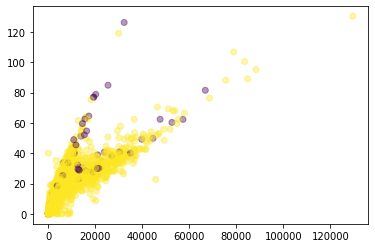

In [13]:
isolationforest_model = IsolationForest(contamination=0.01)
isolationforest_model.fit(df_current_4g_imputed[num_cols])
plt.scatter(df_current_4g_imputed["VOLUME_SESSION"], df_current_4g_imputed["MNT_FORFAIT_DATA"], c = isolationforest_model.predict(df_current_4g_imputed[num_cols]), alpha=0.4)
outliers = isolationforest_model.predict(df_current_4g_imputed[num_cols])==-1

### Removing outliers

In [14]:
df_outliers = pd.DataFrame(data=outliers, index=df_current_4g_cleaned.index, columns=['outliers'])
df_current_4g_imputed = df_current_4g_imputed.join(df_outliers)
df_current_4g_imputed = df_current_4g_imputed.drop(df_current_4g_imputed[df_current_4g_imputed['outliers'] == True].index)
df_current_4g_imputed = df_current_4g_imputed.drop(columns=['outliers'])

In [15]:
mms = StandardScaler()
df_current_4g_scaled = mms.fit_transform(df_current_4g_imputed[num_cols])

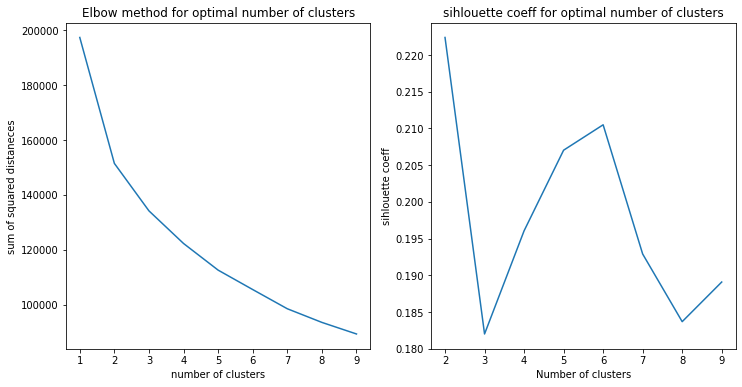

In [16]:
sum_of_sq_dist = []
K = range(1,10)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(df_current_4g_scaled)
    sum_of_sq_dist.append(km.inertia_)
    
sihlouette_coeff = []
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(df_current_4g_scaled)
    score = silhouette_score(df_current_4g_scaled, km.labels_)
    sihlouette_coeff.append(score)

fig, ax = plt.subplots(1,2,figsize=(12,6))
    
ax[0].plot(K,sum_of_sq_dist)
ax[0].set_xlabel('number of clusters')
ax[0].set_ylabel('sum of squared distaneces')
ax[0].set_title('Elbow method for optimal number of clusters')

ax[1].plot(range(2,10), sihlouette_coeff)
ax[1].set_xticks(range(2,10))
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("sihlouette coeff")
ax[1].set_title("sihlouette coeff for optimal number of clusters")

plt.show()

In [17]:
df_clusters = df_current_4g_imputed.copy()
km = KMeans(n_clusters=2)
km.fit(df_clusters[num_cols])
pred = km.predict(df_clusters[num_cols])
df_clusters["cluster"] = pred

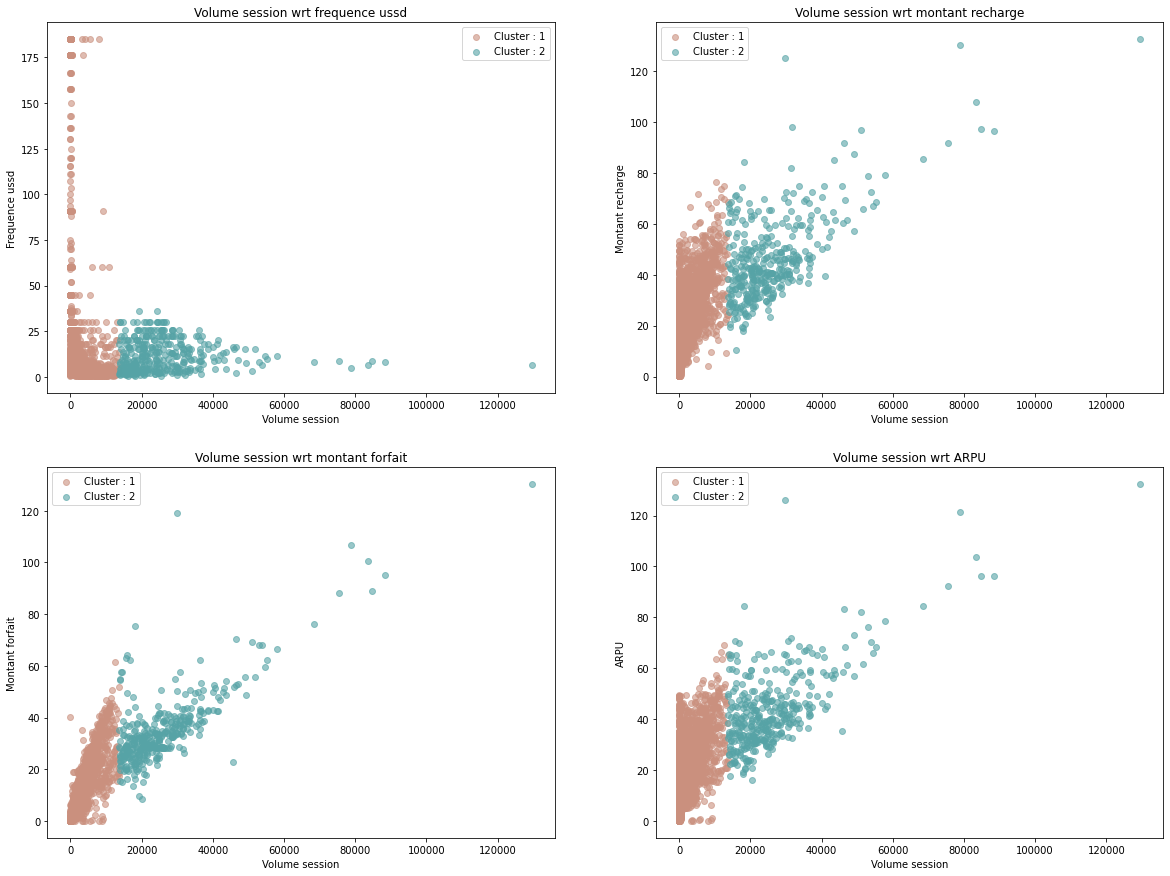

In [18]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
colors = ['#CA907E', '#56A3A6']

for i in range(2):
    ax[0,0].scatter(df_clusters["VOLUME_SESSION"][df_clusters.cluster == i],df_clusters["FREQ_USSD"][df_clusters.cluster == i], c = colors[i], label='Cluster : {}'.format(i+1), alpha=0.6)
    ax[0,1].scatter(df_clusters["VOLUME_SESSION"][df_clusters.cluster == i],df_clusters["MNT_RECH"][df_clusters.cluster == i], c = colors[i],label='Cluster : {}'.format(i+1), alpha=0.6)
    ax[1,0].scatter(df_clusters["VOLUME_SESSION"][df_clusters.cluster == i],df_clusters["MNT_FORFAIT_DATA"][df_clusters.cluster == i], c = colors[i],label='Cluster : {}'.format(i+1), alpha=0.6)
    ax[1,1].scatter(df_clusters["VOLUME_SESSION"][df_clusters.cluster == i],df_clusters["ARPU"][df_clusters.cluster == i], c = colors[i],label='Cluster : {}'.format(i+1), alpha=0.6)

    
ax[0,0].set_title("Volume session wrt frequence ussd")
ax[0,0].set_xlabel("Volume session")
ax[0,0].set_ylabel("Frequence ussd")
# ax[0,0].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
ax[0,0].legend()

ax[0,1].set_title("Volume session wrt montant recharge")
ax[0,1].set_xlabel("Volume session")
ax[0,1].set_ylabel("Montant recharge")
# ax[0,1].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
ax[0,1].legend()

ax[1,0].set_title("Volume session wrt montant forfait")
ax[1,0].set_xlabel("Volume session")
ax[1,0].set_ylabel("Montant forfait")
# ax[1,0].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
ax[1,0].legend()

ax[1,1].set_title("Volume session wrt ARPU")
ax[1,1].set_xlabel("Volume session")
ax[1,1].set_ylabel("ARPU")
# ax[1,1].scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
ax[1,1].legend()

plt.show()

### Modeling

In [19]:
df_final = df_clusters.copy()
df_final = df_final.rename(columns={'cluster':'target'})
X = df_final[num_cols].copy()
y = df_final.target.copy()

In [20]:
df_final.head()

,revenu_voix,ARPM,P_Dur_Offnet,revenu_inter_roaming,revenu_gaming,revenu_sms_plus,VOLUME_SESSION,P_DUR_STAT_S,ARPU,AVG_J_S,...,revenu_roaming,revenu_cdr,revenu_sms,P_revenu_data,P_FF_Journalier,P_FF_mensuel,P_N_Rech_sup5,role,REGION,target
id_code,,,,,,,,,,,,,,,,,,,,,
ID_10012397,15.41,0.04,0.50,0.48,0.00,0.0,0.03,0.0,15.66,0.0,...,0.0,15.66,0.25,0.00,0.00,0.00,0.75,Bridge,Sidi Bouzid,0
ID_10037477,17.96,0.04,0.63,0.00,0.00,0.0,1354.45,0.0,27.09,0.0,...,0.0,18.98,1.03,0.30,0.64,0.37,0.95,Bridge,Sfax,0
ID_10071973,13.69,0.05,0.46,2.00,0.00,0.0,970.34,0.0,21.44,0.0,...,0.0,13.69,0.00,0.36,0.00,1.00,1.00,Bridge,Medenine,0
ID_10075651,1.16,0.00,0.84,0.05,6.15,6.4,3531.53,0.0,18.62,0.0,...,0.0,8.45,7.29,0.55,0.54,0.47,0.77,Bridge,Tunis,0
ID_1009375,8.03,0.05,0.38,0.00,0.00,0.0,77.84,0.0,8.52,0.0,...,0.0,8.03,0.00,0.06,0.50,0.00,1.00,Leader,Nabeul,0


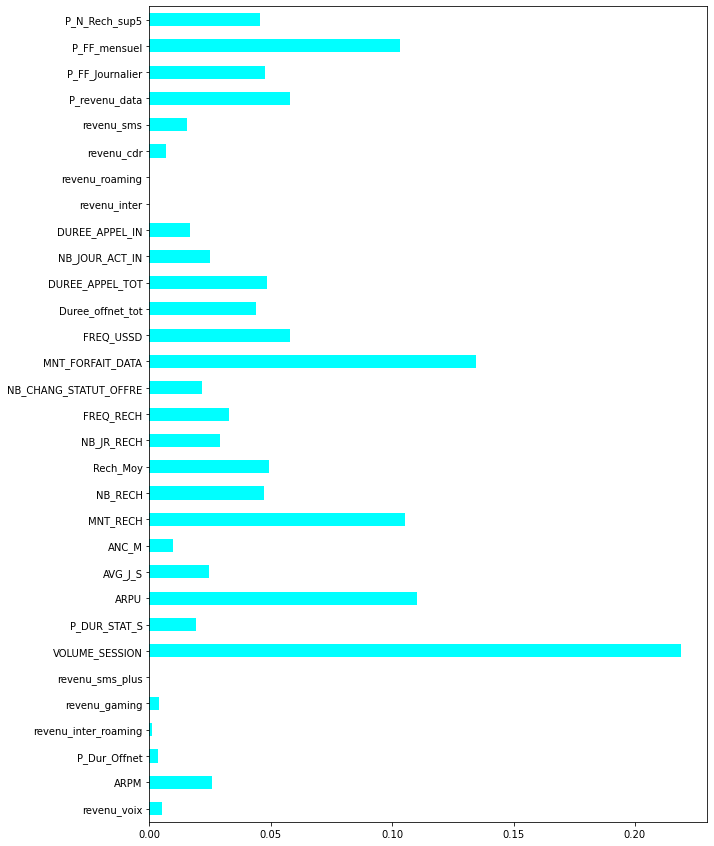

In [21]:
plt.figure(figsize=(10,15))
importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances.plot(kind='barh', color='aqua')

plt.show()

In [22]:
feature_importances[feature_importances>=0.10]

VOLUME_SESSION      0.218965
ARPU                0.110440
MNT_RECH            0.105476
MNT_FORFAIT_DATA    0.134606
P_FF_mensuel        0.103075
dtype: float64

In [23]:
important_cols = ['VOLUME_SESSION','ARPU','MNT_RECH','MNT_FORFAIT_DATA','P_FF_mensuel']

In [24]:
#get dummies and stuff

In [25]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [26]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr_model', LogisticRegression())
])

pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_model', SVC())
])

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_model', XGBClassifier(use_label_encoder=False))
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_model', RandomForestClassifier())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt_model', DecisionTreeClassifier())
])

In [27]:
folds = StratifiedKFold(n_splits=10)
scores_lr = []
scores_svc = []
scores_xgb = []
scores_rf = []
scores_dt = []
for train_index, test_index in folds.split(X[important_cols],y):
    X_train, X_test, y_train, y_test = X[important_cols].to_numpy()[train_index], X[important_cols].to_numpy()[test_index], y.to_numpy()[train_index], y.to_numpy()[test_index]     
    scores_lr.append(get_score(pipeline_lr, X_train, X_test, y_train, y_test))
    scores_svc.append(get_score(pipeline_svc, X_train, X_test, y_train, y_test))
    scores_xgb.append(get_score(pipeline_xgb, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(pipeline_rf, X_train, X_test, y_train, y_test))
    scores_dt.append(get_score(pipeline_dt, X_train, X_test, y_train, y_test))

[17:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:34:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [28]:
print(f'Logistic regression score \t : {sum(scores_lr)/len(scores_lr)}')
print(f'SVC score \t\t\t : {sum(scores_svc)/len(scores_svc)}' )
print(f'XGB score \t\t\t : {sum(scores_xgb)/len(scores_xgb)}')
print(f'Random forest score \t\t : {sum(scores_rf)/len(scores_rf)}')
print(f'Decision tree score \t\t : {sum(scores_dt)/len(scores_dt)}')

Logistic regression score 	 : 0.9989008520679679
SVC score 			 : 0.9971737606508496
XGB score 			 : 1.0
Random forest score 		 : 0.9998430141287283
Decision tree score 		 : 1.0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_final[important_cols],df_final.target,test_size=0.2)

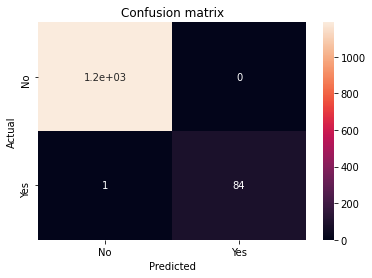

In [30]:
y_pred = pipeline_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()

### Model Tuning 

In [31]:
params_lr = {
    'lr_model__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'lr_model__C' : np.linspace(0,10,100),
    'lr_model__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'lr_model__max_iter' : [100,1000,2000,3000]
}

In [32]:
clf = GridSearchCV(pipeline_lr, param_grid = params_lr, cv = folds, n_jobs=-1, scoring='roc_auc')
best_clf = clf.fit(X_train, y_train)

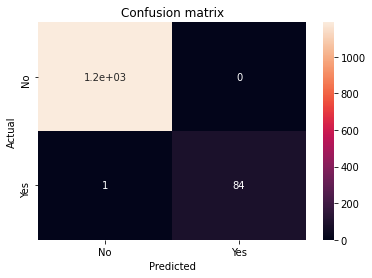

In [33]:
y_pred = best_clf.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(["No","Yes"])
ax.yaxis.set_ticklabels(["No","Yes"])
plt.show()